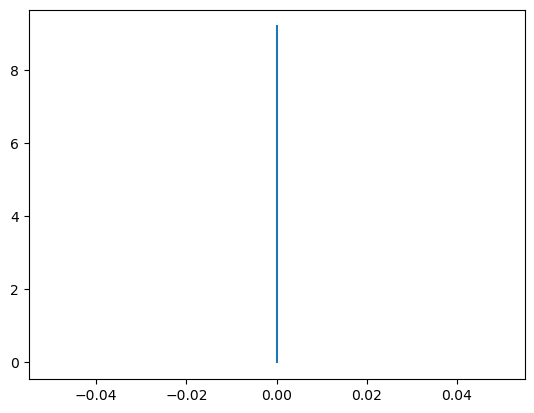

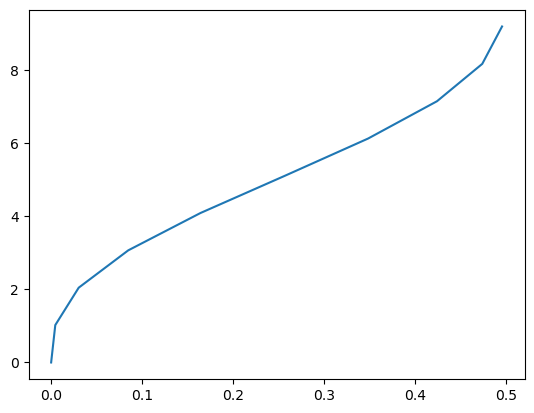

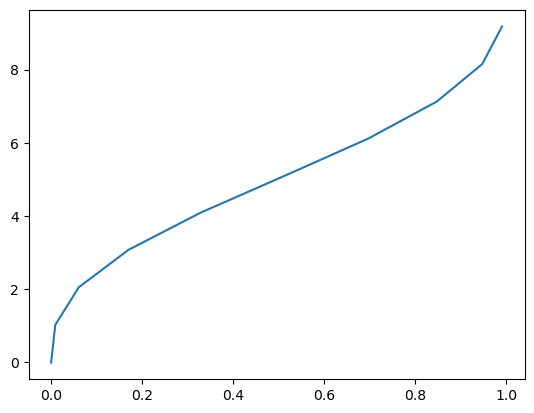

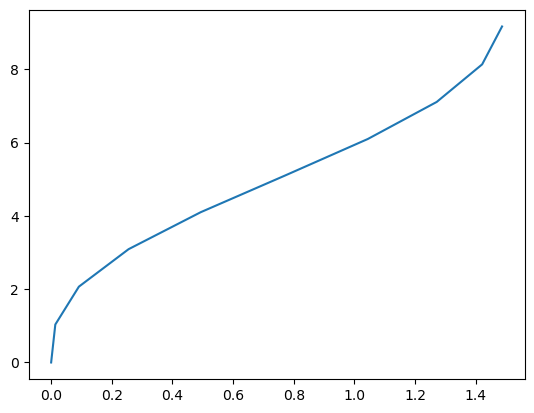

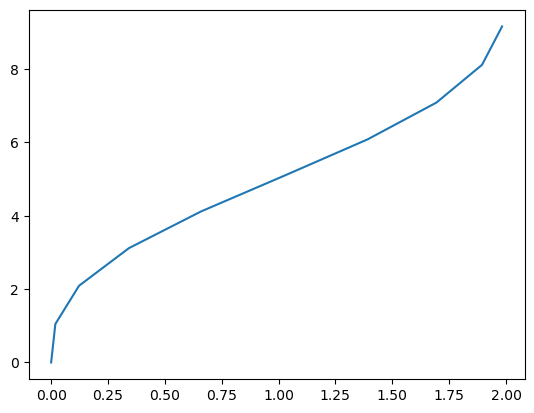

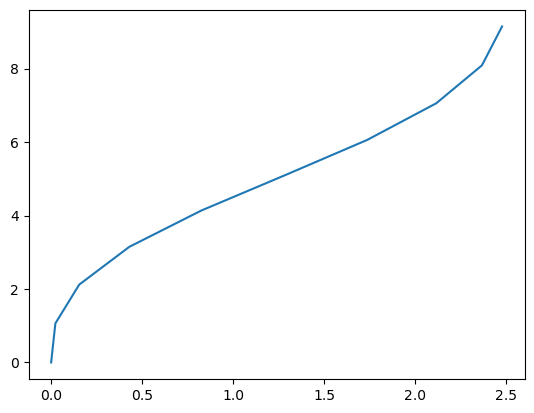

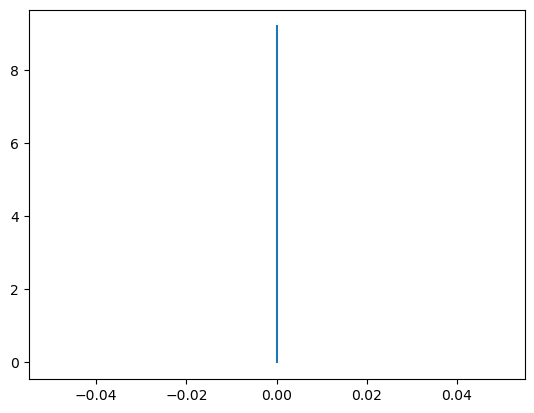

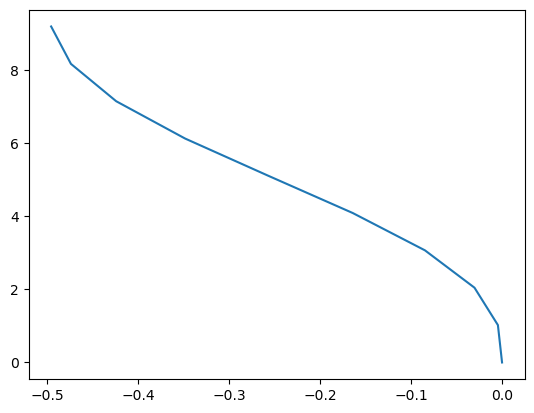

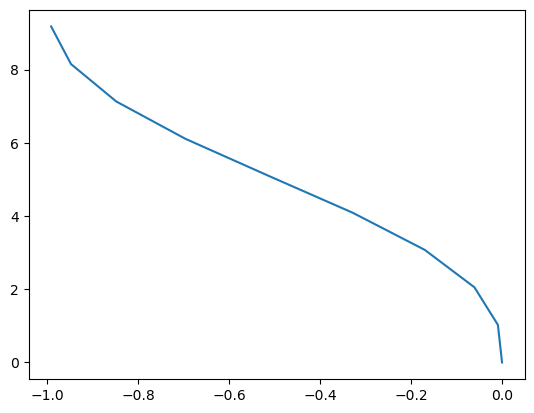

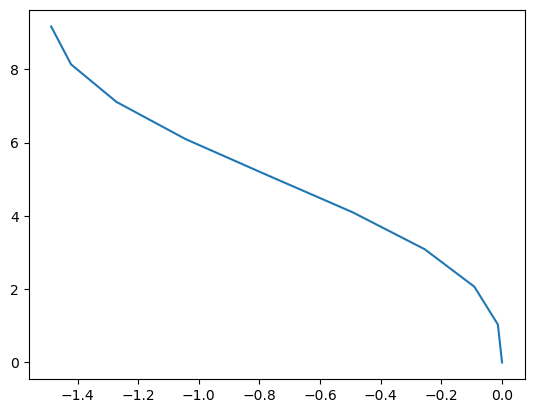

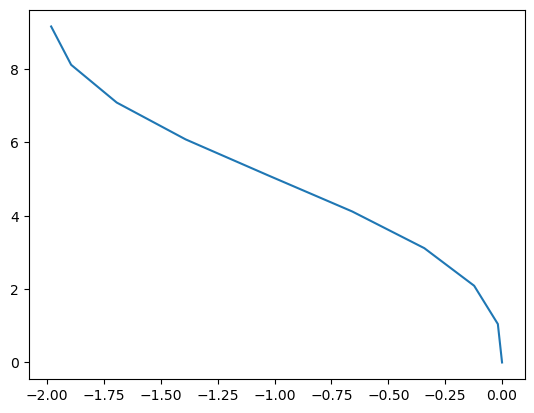

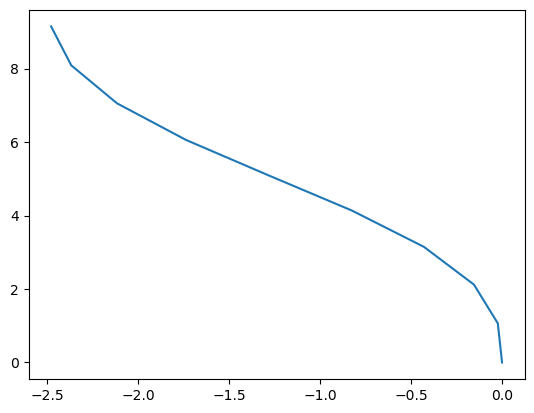

0.0
-0.1663036509299873
-0.6378363544493708
-1.3748264033061037
-2.3392296457865647
-3.4947294857155637
-4.8067368824563355
-6.24239035091054
-7.770555961518269
-9.36182734025804
-10.988525668646798
-12.624699683739909
-14.246125678131188
-15.830307499952843
-17.356476552875538
-18.805591796108352
-20.160339744398794
-21.4051344680328
-22.526117592834737
-23.5111583001674
-24.34985332693199
-25.033526965568168
-25.55523106405399
-25.909745025906
-26.093575810179082
-26.104957931466593
-25.943853459900346
-25.611952021150568
-25.112670796425764
-24.45115452247315
-23.634275491578162
-22.670633551564748
-21.57055610579519
-20.34609811317028
-19.01104208812929
-17.58089810064981
-16.07290377624785
-14.506024295978003
-12.900952396433047
-11.280108369744356
-9.667640063581779
-8.089422881153425
-6.573059781205951
-5.147881278024361
-3.844945441432221
-2.6970378967914463
-1.7386718250021382
-1.0060879625031738
-0.537254601272052
-0.3718675888241298


In [10]:

import numpy as np
import scipy.optimize
import scipy.integrate
from math import sin, cos, pi, sqrt
from matplotlib import pyplot as plt

class PathOptimizer:
    def __init__(self):
        self._xf = 0.0
        self._yf = 0.0
        self._tf = 0.0

    def optimize_spiral(self, xf, yf, tf):
        self._xf = xf
        self._yf = yf
        self._tf = tf
        sf_0 = np.linalg.norm([xf, yf])
        p0 = [0.0, 0.0, sf_0]
        bounds = scipy.optimize.Bounds([-0.5, -0.5, sf_0], [0.5, 0.5, np.inf])
        res = scipy.optimize.minimize(self.objective, p0, method = 'L-BFGS-B', jac = self.objective_grad, bounds = bounds)
        spiral = self.sample_spiral(res.x)
        return spiral


    def thetaf(self, a, b, c, d, s):
        thetas = [a * x + b * x**2 / 2 + c * x**3 / 3 + d * x**4 / 4 for x in s]
        return thetas

    def sample_spiral(self, p):
        p = [0.0, p[0], p[1], 0.0, p[2]]    # recall p0 and p3 are set to 0
                                            # and p4 is the final arc length
        a = p[0]
        b = -(11.0*p[0]/2.0 - 9.0*p[1] + 9.0*p[2]/2.0 - p[3])/p[4]
        c = (9.0*p[0] - 45.0*p[1]/2.0 + 18.0*p[2] - 9.0*p[3]/2.0)/p[4]**2
        d = -(9.0*p[0]/2.0 - 27.0*p[1]/2.0 + 27.0*p[2]/2.0 - 9.0*p[3]/2.0)/p[4]**3


        s_points = np.linspace(0.0, p[4])


        t_points = self.thetaf(a, b, c, d, s_points)
        x_points = scipy.integrate.cumtrapz(np.cos(t_points), s_points, initial=0.0)
        y_points = scipy.integrate.cumtrapz(np.sin(t_points), s_points, initial=0.0)
        return [x_points, y_points, t_points]


    def objective(self, p):
        p = [0.0, p[0], p[1], 0.0, p[2]]
        return self.fbe(p) + 25*(self.fxf(p) + self.fyf(p)) + 30*self.ftf(p)

    def objective_grad(self, p):
        p = [0.0, p[0], p[1], 0.0, p[2]]
        return np.add(np.add(np.add(self.fbe_grad(p), np.multiply(25, self.fxf_grad(p))),np.multiply(25, self.fyf_grad(p))), np.multiply(30, self.ftf_grad(p)))

    def fxf(self, p):
        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = self._xf-p[4]*(cos(p[0]*p[4]-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*t14*(1.0/2.0))+cos(p[0]*p[4]*(1.0/2.0)-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1)+p[4]*t14*(1.0/8.0))*2.0+cos(p[0]*p[4]*(3.0/4.0)-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*t14*(9.0/3.2E1))*2.0+cos(p[0]*p[4]*(1.0/4.0)-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2)+p[4]*t14*(1.0/3.2E1))*2.0+cos(p[0]*p[4]*(3.0/8.0)-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2)+p[4]*t14*(9.0/1.28E2))*4.0+cos(p[0]*p[4]*(1.0/8.0)-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4+p[4]*t14*(1.0/1.28E2))*4.0+cos(p[0]*p[4]*(5.0/8.0)-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*t14*(2.5E1/1.28E2))*4.0+cos(p[0]*p[4]*(7.0/8.0)-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*t14*(4.9E1/1.28E2))*4.0+1.0)*(1.0/2.4E1);
        t0 = t15*t15;
        return t0

    def fxf_grad(self, p):
        grad = [0.0, 0.0, 0.0]

        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[0]*p[4]*(3.0/4.0);
        t18 = p[0]*p[4]*(1.0/4.0);
        t19 = p[0]*p[4]*(3.0/8.0);
        t20 = p[0]*p[4]*(1.0/8.0);
        t21 = p[0]*p[4]*(5.0/8.0);
        t22 = p[0]*p[4]*(7.0/8.0);
        t0 = p[4]*(self._xf-p[4]*(cos(t15-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*t14*(1.0/2.0))+cos(t16-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1)+p[4]*t14*(1.0/8.0))*2.0+cos(t17-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*t14*(9.0/3.2E1))*2.0+cos(t18-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2)+p[4]*t14*(1.0/3.2E1))*2.0+cos(t19-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2)+p[4]*t14*(9.0/1.28E2))*4.0+cos(t20-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4+p[4]*t14*(1.0/1.28E2))*4.0+cos(t21-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*t14*(2.5E1/1.28E2))*4.0+cos(t22-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*t14*(4.9E1/1.28E2))*4.0+1.0)*(1.0/2.4E1))*(p[4]*sin(t15-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*(p[3]-t2+t3-t4)*(1.0/2.0))*(3.0/8.0)+p[4]*sin(t16-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1)+p[4]*(p[3]-t2+t3-t4)*(1.0/8.0))*(5.1E1/6.4E1)+p[4]*sin(t17-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*(p[3]-t2+t3-t4)*(9.0/3.2E1))*8.701171875E-1+p[4]*sin(t18-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2)+p[4]*(p[3]-t2+t3-t4)*(1.0/3.2E1))*3.544921875E-1+p[4]*sin(t19-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2)+p[4]*(p[3]-t2+t3-t4)*(9.0/1.28E2))*1.2161865234375+p[4]*sin(t20-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4+p[4]*(p[3]-t2+t3-t4)*(1.0/1.28E2))*2.259521484375E-1+p[4]*sin(t21-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*(p[3]-t2+t3-t4)*(2.5E1/1.28E2))*1.7669677734375+p[4]*sin(t22-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*(p[3]-t2+t3-t4)*(4.9E1/1.28E2))*1.5970458984375)*(1.0/1.2E1);
        grad[0] = t0

        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[4]*t14*(1.0/8.0);
        t18 = t16+t17-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1);
        t19 = p[0]*p[4]*(3.0/4.0);
        t20 = p[0]*p[4]*(1.0/4.0);
        t21 = p[4]*t14*(1.0/3.2E1);
        t22 = t20+t21-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2);
        t23 = p[0]*p[4]*(3.0/8.0);
        t24 = p[4]*t14*(9.0/1.28E2);
        t25 = t23+t24-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2);
        t26 = p[0]*p[4]*(1.0/8.0);
        t27 = p[4]*t14*(1.0/1.28E2);
        t28 = t26+t27-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4;
        t29 = p[0]*p[4]*(5.0/8.0);
        t30 = p[0]*p[4]*(7.0/8.0);
        t0 = p[4]*(self._xf-p[4]*(cos(t15-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*t14*(1.0/2.0))+cos(t19-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*t14*(9.0/3.2E1))*2.0+cos(t29-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*t14*(2.5E1/1.28E2))*4.0+cos(t30-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*t14*(4.9E1/1.28E2))*4.0+cos(t18)*2.0+cos(t22)*2.0+cos(t25)*4.0+cos(t28)*4.0+1.0)*(1.0/2.4E1))*(p[4]*sin(t15-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*(p[3]-t2+t3-t4)*(1.0/2.0))*(3.0/8.0)+p[4]*sin(t19-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*(p[3]-t2+t3-t4)*(9.0/3.2E1))*3.955078125E-1+p[4]*sin(t29-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*(p[3]-t2+t3-t4)*(2.5E1/1.28E2))*2.838134765625E-1+p[4]*sin(t30-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*(p[3]-t2+t3-t4)*(4.9E1/1.28E2))*1.2740478515625-p[4]*sin(t18)*(3.0/6.4E1)-p[4]*sin(t22)*1.201171875E-1-p[4]*sin(t25)*2.669677734375E-1-p[4]*sin(t28)*9.70458984375E-2)*(1.0/1.2E1);
        grad[1] = t0

        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[0]*p[4]*(3.0/4.0);
        t18 = p[0]*p[4]*(1.0/4.0);
        t19 = p[0]*p[4]*(3.0/8.0);
        t20 = p[0]*p[4]*(1.0/8.0);
        t21 = p[0]*p[4]*(5.0/8.0);
        t22 = p[0]*p[4]*(7.0/8.0);
        t23 = p[4]*(p[3]-t2+t3-t4)*(1.0/2.0);
        t39 = p[4]*t9*(1.0/4.0);
        t40 = p[4]*t13*(1.0/3.0);
        t24 = t15+t23-t39-t40;
        t25 = p[4]*(p[3]-t2+t3-t4)*(1.0/8.0);
        t41 = p[4]*t9*(1.0/6.4E1);
        t42 = p[4]*t13*(1.0/2.4E1);
        t26 = t16+t25-t41-t42;
        t27 = p[4]*(p[3]-t2+t3-t4)*(1.0/3.2E1);
        t45 = p[4]*t9*9.765625E-4;
        t46 = p[4]*t13*(1.0/1.92E2);
        t28 = t18+t27-t45-t46;
        t29 = p[4]*(p[3]-t2+t3-t4)*(9.0/3.2E1);
        t43 = p[4]*t9*7.91015625E-2;
        t44 = p[4]*t13*(9.0/6.4E1);
        t30 = t17+t29-t43-t44;
        t31 = p[4]*(p[3]-t2+t3-t4)*(1.0/1.28E2);
        t49 = p[4]*t9*6.103515625E-5;
        t50 = p[4]*t13*6.510416666666667E-4;
        t32 = t20+t31-t49-t50;
        t33 = p[4]*(p[3]-t2+t3-t4)*(9.0/1.28E2);
        t47 = p[4]*t9*4.94384765625E-3;
        t48 = p[4]*t13*(9.0/5.12E2);
        t34 = t19+t33-t47-t48;
        t35 = p[4]*(p[3]-t2+t3-t4)*(2.5E1/1.28E2);
        t51 = p[4]*t9*3.814697265625E-2;
        t52 = p[4]*t13*8.138020833333333E-2;
        t36 = t21+t35-t51-t52;
        t37 = p[4]*(p[3]-t2+t3-t4)*(4.9E1/1.28E2);
        t53 = p[4]*t9*1.4654541015625E-1;
        t54 = p[4]*t13*2.233072916666667E-1;
        t38 = t22+t37-t53-t54;
        t0 = (self._xf-p[4]*(cos(t15-t39-t40+p[4]*t14*(1.0/2.0))+cos(t16-t41-t42+p[4]*t14*(1.0/8.0))*2.0+cos(t18-t45-t46+p[4]*t14*(1.0/3.2E1))*2.0+cos(t17-t43-t44+p[4]*t14*(9.0/3.2E1))*2.0+cos(t20-t49-t50+p[4]*t14*(1.0/1.28E2))*4.0+cos(t19-t47-t48+p[4]*t14*(9.0/1.28E2))*4.0+cos(t21-t51-t52+p[4]*t14*(2.5E1/1.28E2))*4.0+cos(t22-t53-t54+p[4]*t14*(4.9E1/1.28E2))*4.0+1.0)*(1.0/2.4E1))*(cos(t24)*(1.0/2.4E1)+cos(t26)*(1.0/1.2E1)+cos(t28)*(1.0/1.2E1)+cos(t30)*(1.0/1.2E1)+cos(t32)*(1.0/6.0)+cos(t34)*(1.0/6.0)+cos(t36)*(1.0/6.0)+cos(t38)*(1.0/6.0)-p[4]*(sin(t24)*(p[0]*(1.0/8.0)+p[1]*(3.0/8.0)+p[2]*(3.0/8.0)+p[3]*(1.0/8.0))+sin(t26)*(p[0]*(1.5E1/1.28E2)+p[1]*(5.1E1/1.28E2)-p[2]*(3.0/1.28E2)+p[3]*(1.0/1.28E2))*2.0+sin(t28)*(p[0]*1.2060546875E-1+p[1]*1.7724609375E-1-p[2]*6.005859375E-2+p[3]*1.220703125E-2)*2.0+sin(t30)*(p[0]*1.1279296875E-1+p[1]*4.3505859375E-1+p[2]*1.9775390625E-1+p[3]*4.39453125E-3)*2.0+sin(t32)*(p[0]*8.7615966796875E-2+p[1]*5.6488037109375E-2-p[2]*2.4261474609375E-2+p[3]*5.157470703125E-3)*4.0+sin(t34)*(p[0]*1.24237060546875E-1+p[1]*3.04046630859375E-1-p[2]*6.6741943359375E-2+p[3]*1.3458251953125E-2)*4.0+sin(t36)*(p[0]*1.11541748046875E-1+p[1]*4.41741943359375E-1+p[2]*7.0953369140625E-2+p[3]*7.62939453125E-4)*4.0+sin(t38)*(p[0]*1.19842529296875E-1+p[1]*3.99261474609375E-1+p[2]*3.18511962890625E-1+p[3]*3.7384033203125E-2)*4.0)*(1.0/2.4E1)+1.0/2.4E1)*-2.0;
        grad[2] = t0

        return grad

    def fyf(self, p):
        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = self._yf-p[4]*(sin(p[0]*p[4]-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0)+p[4]*t14*(1.0/2.0))+sin(p[0]*p[4]*(1.0/2.0)-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1)+p[4]*t14*(1.0/8.0))*2.0+sin(p[0]*p[4]*(3.0/4.0)-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1)+p[4]*t14*(9.0/3.2E1))*2.0+sin(p[0]*p[4]*(1.0/4.0)-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2)+p[4]*t14*(1.0/3.2E1))*2.0+sin(p[0]*p[4]*(3.0/8.0)-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2)+p[4]*t14*(9.0/1.28E2))*4.0+sin(p[0]*p[4]*(1.0/8.0)-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4+p[4]*t14*(1.0/1.28E2))*4.0+sin(p[0]*p[4]*(5.0/8.0)-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2+p[4]*t14*(2.5E1/1.28E2))*4.0+sin(p[0]*p[4]*(7.0/8.0)-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1+p[4]*t14*(4.9E1/1.28E2))*4.0)*(1.0/2.4E1);
        t0 = t15*t15;
        return t0

    def fyf_grad(self, p):
        grad = [0.0, 0.0, 0.0]

        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[0]*p[4]*(3.0/4.0);
        t18 = p[0]*p[4]*(1.0/4.0);
        t19 = p[0]*p[4]*(3.0/8.0);
        t20 = p[0]*p[4]*(1.0/8.0);
        t21 = p[0]*p[4]*(5.0/8.0);
        t22 = p[0]*p[4]*(7.0/8.0);
        t23 = p[4]*t14*(1.0/2.0);
        t24 = t15+t23-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0);
        t25 = p[4]*t14*(1.0/8.0);
        t26 = t16+t25-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1);
        t27 = p[4]*t14*(9.0/3.2E1);
        t28 = t17+t27-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1);
        t29 = p[4]*t14*(1.0/3.2E1);
        t30 = t18+t29-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2);
        t31 = p[4]*t14*(9.0/1.28E2);
        t32 = t19+t31-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2);
        t33 = p[4]*t14*(1.0/1.28E2);
        t34 = t20+t33-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4;
        t35 = p[4]*t14*(2.5E1/1.28E2);
        t36 = t21+t35-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2;
        t37 = p[4]*t14*(4.9E1/1.28E2);
        t38 = t22+t37-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1;
        t0 = p[4]*(self._yf-p[4]*(sin(t24)+sin(t26)*2.0+sin(t28)*2.0+sin(t30)*2.0+sin(t32)*4.0+sin(t34)*4.0+sin(t36)*4.0+sin(t38)*4.0)*(1.0/2.4E1))*(p[4]*cos(t24)*(3.0/8.0)+p[4]*cos(t26)*(5.1E1/6.4E1)+p[4]*cos(t28)*8.701171875E-1+p[4]*cos(t30)*3.544921875E-1+p[4]*cos(t32)*1.2161865234375+p[4]*cos(t34)*2.259521484375E-1+p[4]*cos(t36)*1.7669677734375+p[4]*cos(t38)*1.5970458984375)*(-1.0/1.2E1);
        grad[0] = t0


        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[4]*t14*(1.0/8.0);
        t18 = t16+t17-p[4]*t9*(1.0/6.4E1)-p[4]*t13*(1.0/2.4E1);
        t19 = p[0]*p[4]*(3.0/4.0);
        t20 = p[0]*p[4]*(1.0/4.0);
        t21 = p[4]*t14*(1.0/3.2E1);
        t22 = t20+t21-p[4]*t9*9.765625E-4-p[4]*t13*(1.0/1.92E2);
        t23 = p[0]*p[4]*(3.0/8.0);
        t24 = p[4]*t14*(9.0/1.28E2);
        t25 = t23+t24-p[4]*t9*4.94384765625E-3-p[4]*t13*(9.0/5.12E2);
        t26 = p[0]*p[4]*(1.0/8.0);
        t27 = p[4]*t14*(1.0/1.28E2);
        t28 = t26+t27-p[4]*t9*6.103515625E-5-p[4]*t13*6.510416666666667E-4;
        t29 = p[0]*p[4]*(5.0/8.0);
        t30 = p[0]*p[4]*(7.0/8.0);
        t31 = p[4]*t14*(1.0/2.0);
        t32 = t15+t31-p[4]*t9*(1.0/4.0)-p[4]*t13*(1.0/3.0);
        t33 = p[4]*t14*(9.0/3.2E1);
        t34 = t19+t33-p[4]*t9*7.91015625E-2-p[4]*t13*(9.0/6.4E1);
        t35 = p[4]*t14*(2.5E1/1.28E2);
        t36 = t29+t35-p[4]*t9*3.814697265625E-2-p[4]*t13*8.138020833333333E-2;
        t37 = p[4]*t14*(4.9E1/1.28E2);
        t38 = t30+t37-p[4]*t9*1.4654541015625E-1-p[4]*t13*2.233072916666667E-1;
        t0 = p[4]*(self._yf-p[4]*(sin(t18)*2.0+sin(t22)*2.0+sin(t25)*4.0+sin(t28)*4.0+sin(t32)+sin(t34)*2.0+sin(t36)*4.0+sin(t38)*4.0)*(1.0/2.4E1))*(p[4]*cos(t18)*(3.0/6.4E1)+p[4]*cos(t22)*1.201171875E-1+p[4]*cos(t25)*2.669677734375E-1+p[4]*cos(t28)*9.70458984375E-2-p[4]*cos(t32)*(3.0/8.0)-p[4]*cos(t34)*3.955078125E-1-p[4]*cos(t36)*2.838134765625E-1-p[4]*cos(t38)*1.2740478515625)*(1.0/1.2E1);
        grad[1] = t0

        t2 = p[0]*(1.1E1/2.0);
        t3 = p[1]*9.0;
        t4 = p[2]*(9.0/2.0);
        t5 = p[0]*(9.0/2.0);
        t6 = p[1]*(2.7E1/2.0);
        t7 = p[2]*(2.7E1/2.0);
        t8 = p[3]*(9.0/2.0);
        t9 = t5-t6+t7-t8;
        t10 = p[0]*9.0;
        t11 = p[1]*(4.5E1/2.0);
        t12 = p[2]*1.8E1;
        t13 = t8-t10+t11-t12;
        t14 = p[3]-t2+t3-t4;
        t15 = p[0]*p[4];
        t16 = p[0]*p[4]*(1.0/2.0);
        t17 = p[0]*p[4]*(3.0/4.0);
        t18 = p[0]*p[4]*(1.0/4.0);
        t19 = p[0]*p[4]*(3.0/8.0);
        t20 = p[0]*p[4]*(1.0/8.0);
        t21 = p[0]*p[4]*(5.0/8.0);
        t22 = p[0]*p[4]*(7.0/8.0);
        t23 = p[4]*(p[3]-t2+t3-t4)*(1.0/2.0);
        t39 = p[4]*t9*(1.0/4.0);
        t40 = p[4]*t13*(1.0/3.0);
        t24 = t15+t23-t39-t40;
        t25 = p[4]*(p[3]-t2+t3-t4)*(1.0/8.0);
        t41 = p[4]*t9*(1.0/6.4E1);
        t42 = p[4]*t13*(1.0/2.4E1);
        t26 = t16+t25-t41-t42;
        t27 = p[4]*(p[3]-t2+t3-t4)*(1.0/3.2E1);
        t45 = p[4]*t9*9.765625E-4;
        t46 = p[4]*t13*(1.0/1.92E2);
        t28 = t18+t27-t45-t46;
        t29 = p[4]*(p[3]-t2+t3-t4)*(9.0/3.2E1);
        t43 = p[4]*t9*7.91015625E-2;
        t44 = p[4]*t13*(9.0/6.4E1);
        t30 = t17+t29-t43-t44;
        t31 = p[4]*(p[3]-t2+t3-t4)*(1.0/1.28E2);
        t49 = p[4]*t9*6.103515625E-5;
        t50 = p[4]*t13*6.510416666666667E-4;
        t32 = t20+t31-t49-t50;
        t33 = p[4]*(p[3]-t2+t3-t4)*(9.0/1.28E2);
        t47 = p[4]*t9*4.94384765625E-3;
        t48 = p[4]*t13*(9.0/5.12E2);
        t34 = t19+t33-t47-t48;
        t35 = p[4]*(p[3]-t2+t3-t4)*(2.5E1/1.28E2);
        t51 = p[4]*t9*3.814697265625E-2;
        t52 = p[4]*t13*8.138020833333333E-2;
        t36 = t21+t35-t51-t52;
        t37 = p[4]*(p[3]-t2+t3-t4)*(4.9E1/1.28E2);
        t53 = p[4]*t9*1.4654541015625E-1;
        t54 = p[4]*t13*2.233072916666667E-1;
        t38 = t22+t37-t53-t54;
        t0 = (self._yf-p[4]*(sin(t15-t39-t40+p[4]*t14*(1.0/2.0))+sin(t16-t41-t42+p[4]*t14*(1.0/8.0))*2.0+sin(t18-t45-t46+p[4]*t14*(1.0/3.2E1))*2.0+sin(t17-t43-t44+p[4]*t14*(9.0/3.2E1))*2.0+sin(t20-t49-t50+p[4]*t14*(1.0/1.28E2))*4.0+sin(t19-t47-t48+p[4]*t14*(9.0/1.28E2))*4.0+sin(t21-t51-t52+p[4]*t14*(2.5E1/1.28E2))*4.0+sin(t22-t53-t54+p[4]*t14*(4.9E1/1.28E2))*4.0)*(1.0/2.4E1))*(sin(t24)*(1.0/2.4E1)+sin(t26)*(1.0/1.2E1)+sin(t28)*(1.0/1.2E1)+sin(t30)*(1.0/1.2E1)+sin(t32)*(1.0/6.0)+sin(t34)*(1.0/6.0)+sin(t36)*(1.0/6.0)+sin(t38)*(1.0/6.0)+p[4]*(cos(t24)*(p[0]*(1.0/8.0)+p[1]*(3.0/8.0)+p[2]*(3.0/8.0)+p[3]*(1.0/8.0))+cos(t26)*(p[0]*(1.5E1/1.28E2)+p[1]*(5.1E1/1.28E2)-p[2]*(3.0/1.28E2)+p[3]*(1.0/1.28E2))*2.0+cos(t28)*(p[0]*1.2060546875E-1+p[1]*1.7724609375E-1-p[2]*6.005859375E-2+p[3]*1.220703125E-2)*2.0+cos(t30)*(p[0]*1.1279296875E-1+p[1]*4.3505859375E-1+p[2]*1.9775390625E-1+p[3]*4.39453125E-3)*2.0+cos(t32)*(p[0]*8.7615966796875E-2+p[1]*5.6488037109375E-2-p[2]*2.4261474609375E-2+p[3]*5.157470703125E-3)*4.0+cos(t34)*(p[0]*1.24237060546875E-1+p[1]*3.04046630859375E-1-p[2]*6.6741943359375E-2+p[3]*1.3458251953125E-2)*4.0+cos(t36)*(p[0]*1.11541748046875E-1+p[1]*4.41741943359375E-1+p[2]*7.0953369140625E-2+p[3]*7.62939453125E-4)*4.0+cos(t38)*(p[0]*1.19842529296875E-1+p[1]*3.99261474609375E-1+p[2]*3.18511962890625E-1+p[3]*3.7384033203125E-2)*4.0)*(1.0/2.4E1))*-2.0;
        grad[2] = t0

        return grad

    def ftf(self, p):
      t2 = self._tf-p[0]*p[4]+p[4]*(p[0]*(1.1E1/2.0)-p[1]*9.0+p[2]*(9.0/2.0)-p[3])*(1.0/2.0)+p[4]*(p[0]*(9.0/2.0)-p[1]*(2.7E1/2.0)+p[2]*(2.7E1/2.0)-p[3]*(9.0/2.0))*(1.0/4.0)-p[4]*(p[0]*9.0-p[1]*(4.5E1/2.0)+p[2]*1.8E1-p[3]*(9.0/2.0))*(1.0/3.0);
      t0 = t2*t2;
      return t0

    def ftf_grad(self, p):
        grad = [0.0, 0.0, 0.0]

        t0 = p[4]*(self._tf-p[0]*p[4]+p[4]*(p[0]*(1.1E1/2.0)-p[1]*9.0+p[2]*(9.0/2.0)-p[3])*(1.0/2.0)+p[4]*(p[0]*(9.0/2.0)-p[1]*(2.7E1/2.0)+p[2]*(2.7E1/2.0)-p[3]*(9.0/2.0))*(1.0/4.0)-p[4]*(p[0]*9.0-p[1]*(4.5E1/2.0)+p[2]*1.8E1-p[3]*(9.0/2.0))*(1.0/3.0))*(-3.0/4.0);
        grad[0] = t0

        t0 = p[4]*(self._tf-p[0]*p[4]+p[4]*(p[0]*(1.1E1/2.0)-p[1]*9.0+p[2]*(9.0/2.0)-p[3])*(1.0/2.0)+p[4]*(p[0]*(9.0/2.0)-p[1]*(2.7E1/2.0)+p[2]*(2.7E1/2.0)-p[3]*(9.0/2.0))*(1.0/4.0)-p[4]*(p[0]*9.0-p[1]*(4.5E1/2.0)+p[2]*1.8E1-p[3]*(9.0/2.0))*(1.0/3.0))*(-3.0/4.0);
        grad[1] = t0

        t0 = (p[0]*(1.0/8.0)+p[1]*(3.0/8.0)+p[2]*(3.0/8.0)+p[3]*(1.0/8.0))*(self._tf-p[0]*p[4]+p[4]*(p[0]*(1.1E1/2.0)-p[1]*9.0+p[2]*(9.0/2.0)-p[3])*(1.0/2.0)+p[4]*(p[0]*(9.0/2.0)-p[1]*(2.7E1/2.0)+p[2]*(2.7E1/2.0)-p[3]*(9.0/2.0))*(1.0/4.0)-p[4]*(p[0]*9.0-p[1]*(4.5E1/2.0)+p[2]*1.8E1-p[3]*(9.0/2.0))*(1.0/3.0))*-2.0;
        grad[2] = t0

        return grad

    def fbe(self, p):
        t0 = p[4]*(p[0]*p[1]*9.9E1-p[0]*p[2]*3.6E1+p[0]*p[3]*1.9E1-p[1]*p[2]*8.1E1-p[1]*p[3]*3.6E1+p[2]*p[3]*9.9E1+(p[0]*p[0])*6.4E1+(p[1]*p[1])*3.24E2+(p[2]*p[2])*3.24E2+(p[3]*p[3])*6.4E1)*(1.0/8.4E2);
        return t0

    def fbe_grad(self, p):
        grad = [0.0, 0.0, 0.0]

        t0 = p[4]*(p[0]*9.9E1+p[1]*6.48E2-p[2]*8.1E1-p[3]*3.6E1)*(1.0/8.4E2);
        grad[0] = t0

        t0 = p[4]*(p[0]*3.6E1+p[1]*8.1E1-p[2]*6.48E2-p[3]*9.9E1)*(-1.0/8.4E2);
        grad[1] = t0

        t0 = p[0]*p[1]*(3.3E1/2.8E2)-p[0]*p[2]*(3.0/7.0E1)+p[0]*p[3]*(1.9E1/8.4E2)-p[1]*p[2]*(2.7E1/2.8E2)-p[1]*p[3]*(3.0/7.0E1)+p[2]*p[3]*(3.3E1/2.8E2)+(p[0]*p[0])*(8.0/1.05E2)+(p[1]*p[1])*(2.7E1/7.0E1)+(p[2]*p[2])*(2.7E1/7.0E1)+(p[3]*p[3])*(8.0/1.05E2);
        grad[2] = t0

        return grad

_path_optimizer = PathOptimizer()
#down to up
for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i/2,0)
    path1=path[1][::5]
    path2=path[0][::5]
    
    plt.plot(path1,path2)
    plt.show()

for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i*-1/2,0)
    path1=path[1][::5]
    path2=path[0][::5]
    
    plt.plot(path1,path2)
    plt.show()
#print(type(list(path1)))
for i in path[2]:
    print(i*180/3.14)

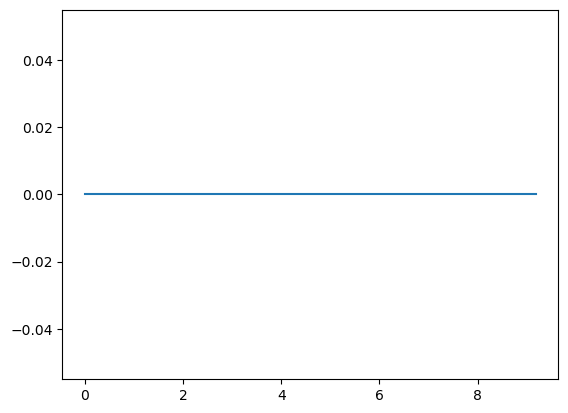

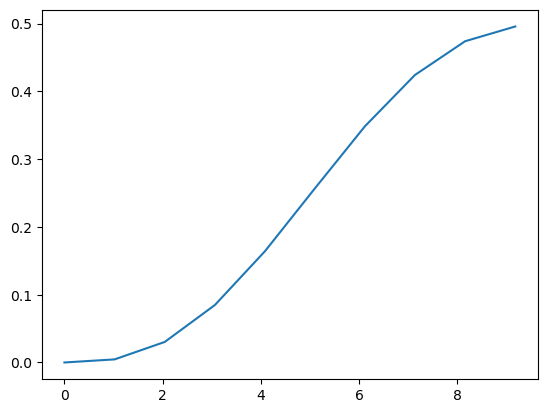

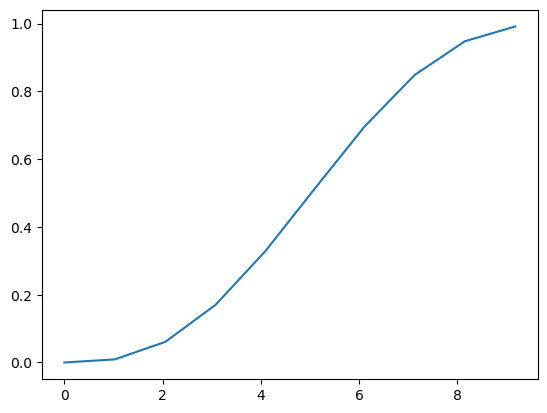

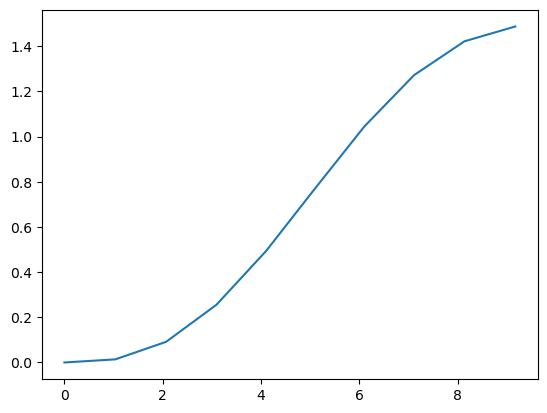

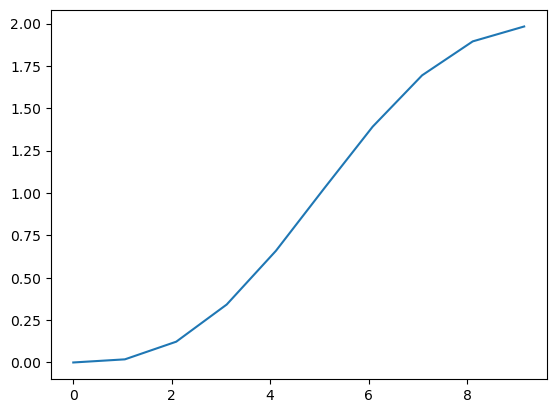

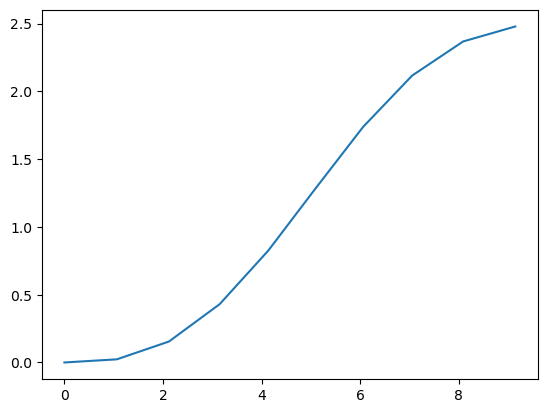

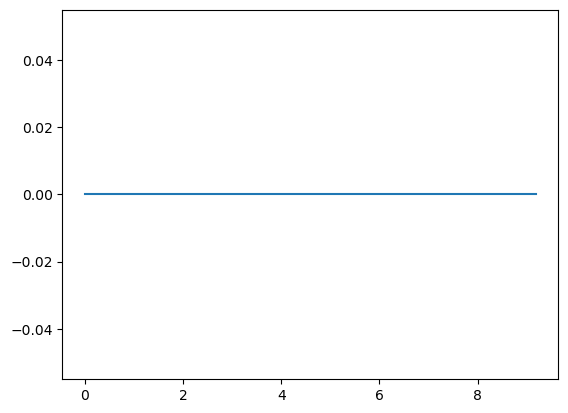

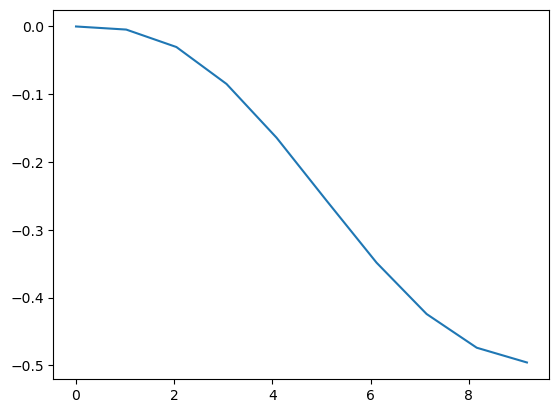

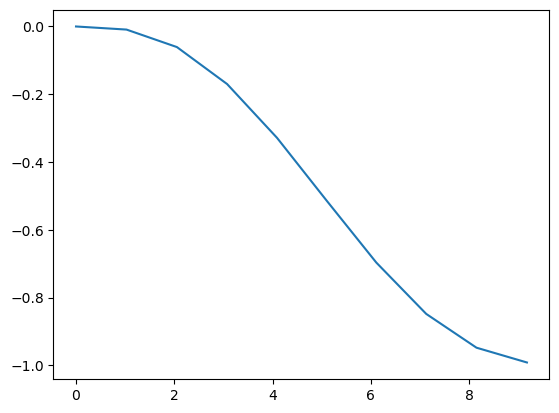

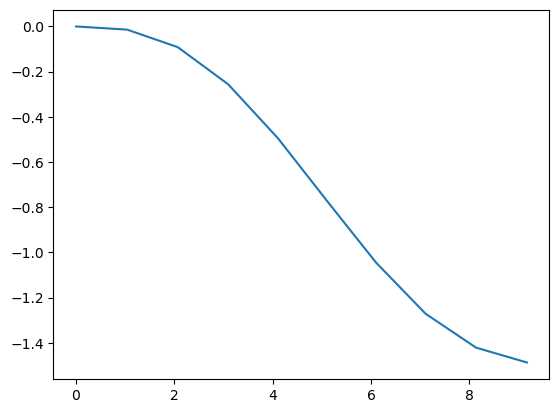

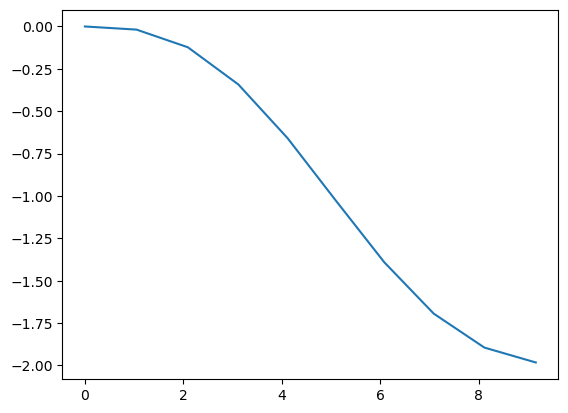

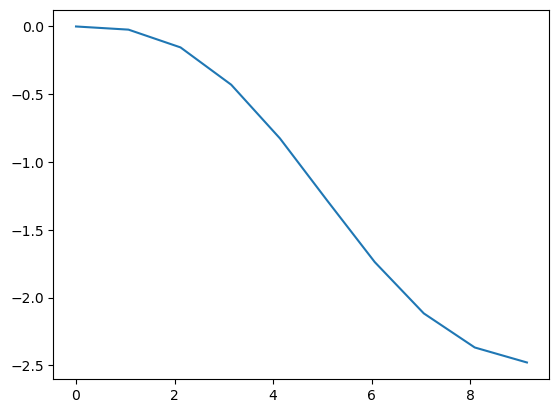

10


In [2]:
#left to right
for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i/2,0)
    path1=path[0][::5]
    path2=path[1][::5]
    
    plt.plot(path1,path2)
    plt.show()

for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i*-1/2,0)
    path1=path[0][::5]
    path2=path[1][::5]
    
    plt.plot(path1,path2)
    plt.show()
print(len(path1))

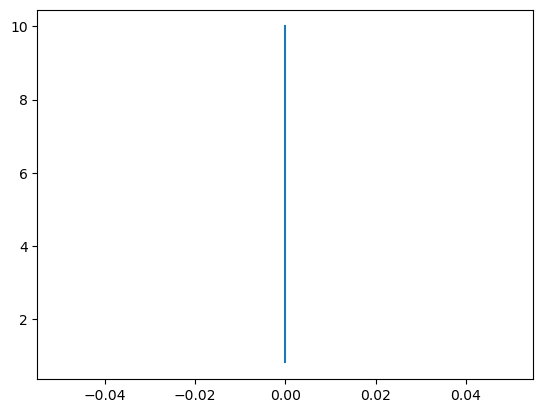

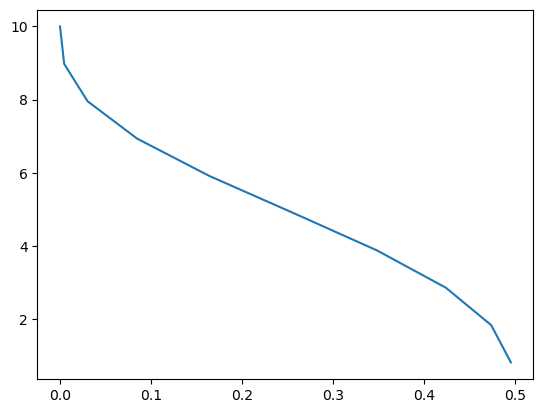

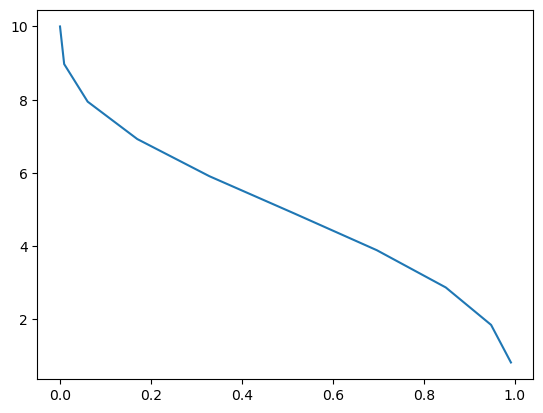

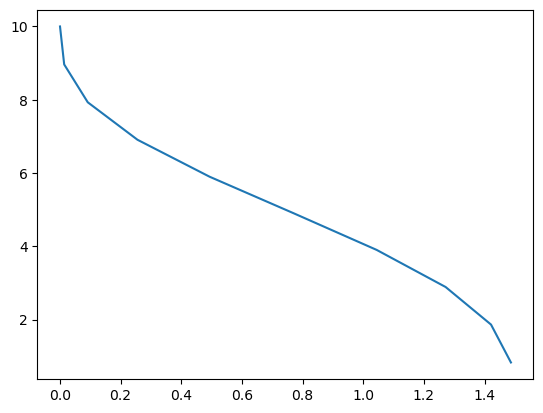

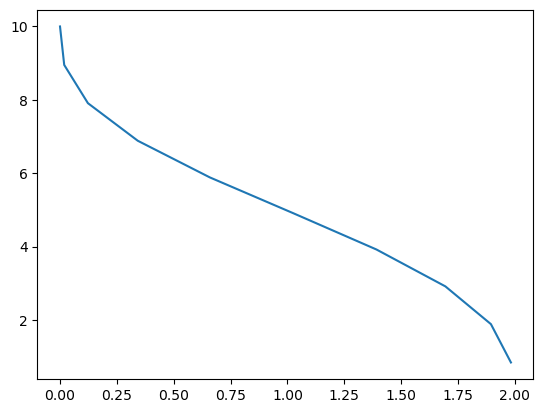

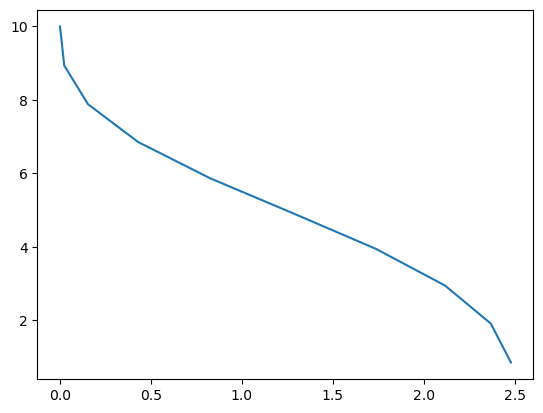

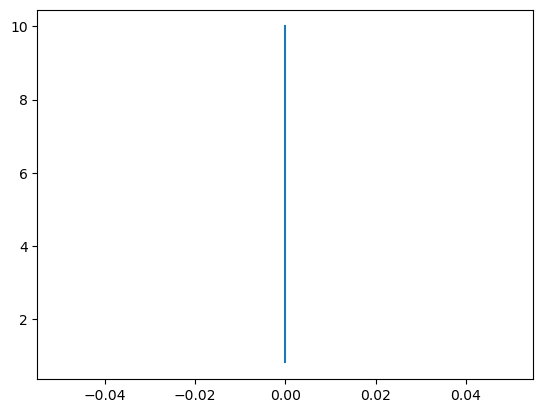

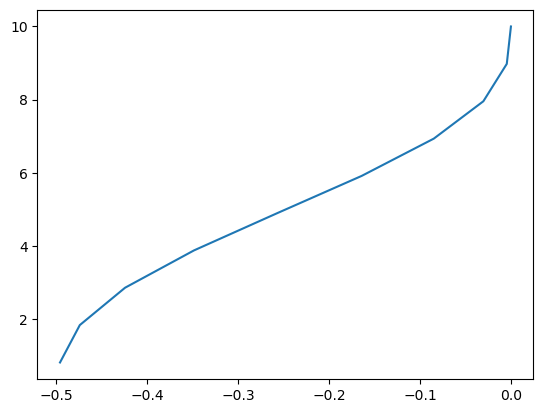

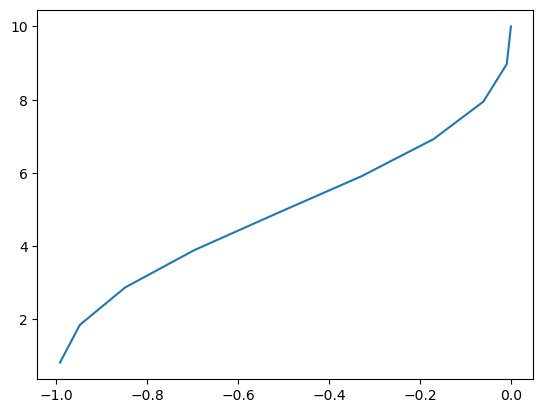

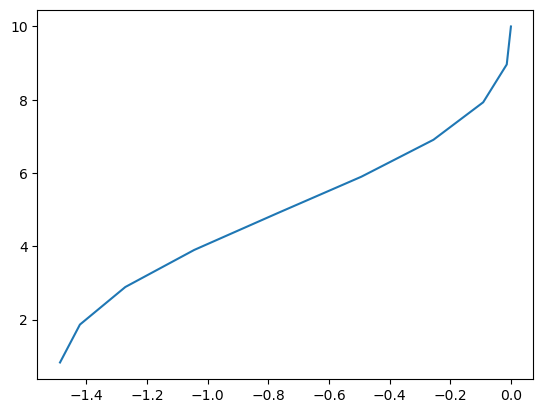

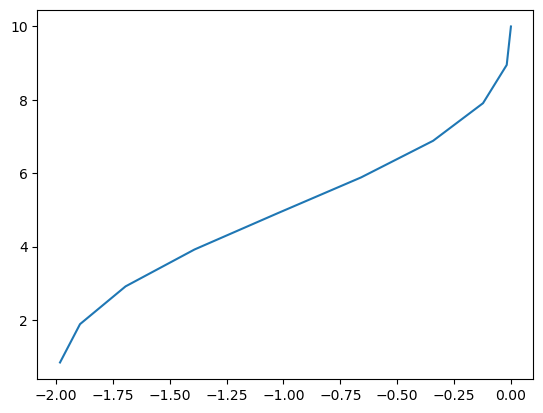

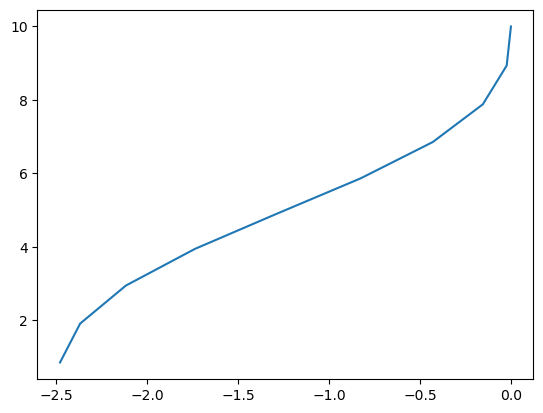

10


In [3]:
#up to down
for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i/2,0)
    path1=path[1][::5]
    path2=path[0][::-5]
    plt.plot(path1,path2)
    plt.show()

for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i*-1/2,0)
    path1=path[1][::5]
    path2=path[0][::-5]
    plt.plot(path1,path2)
    plt.show()
print(len(path1))

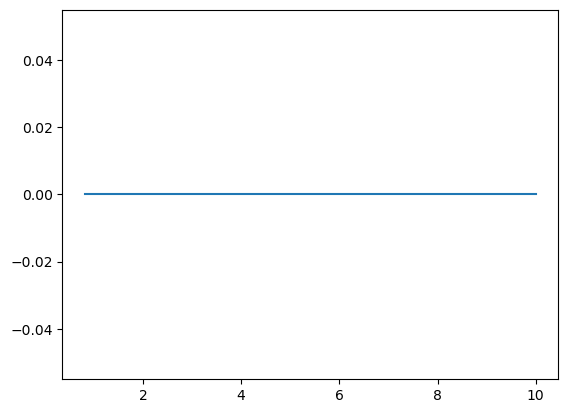

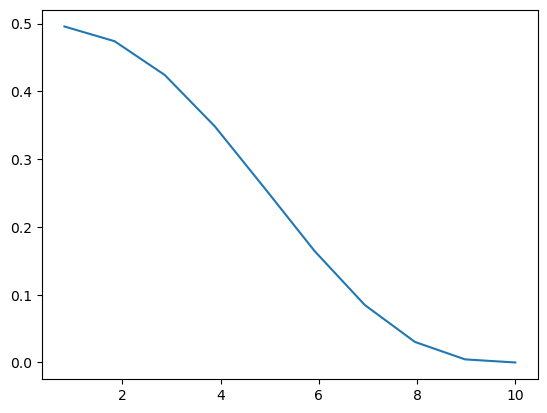

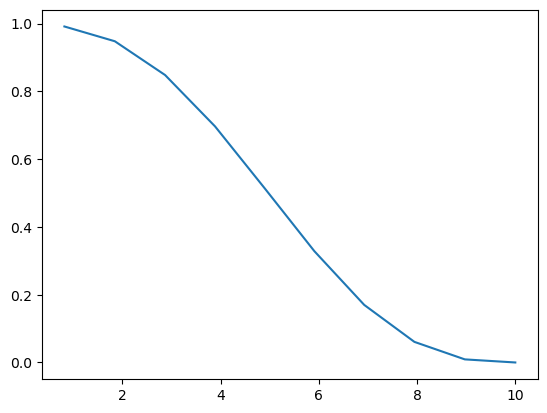

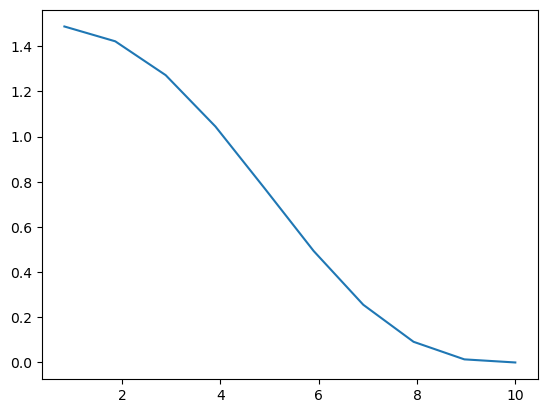

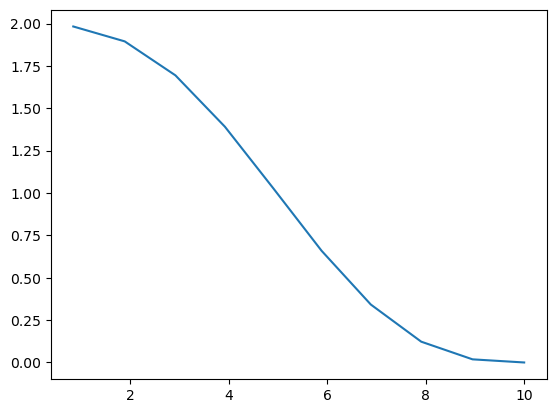

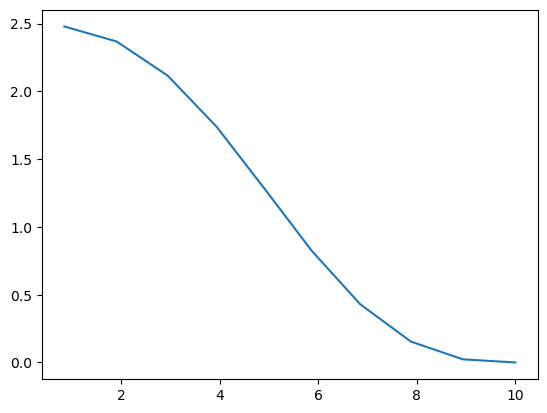

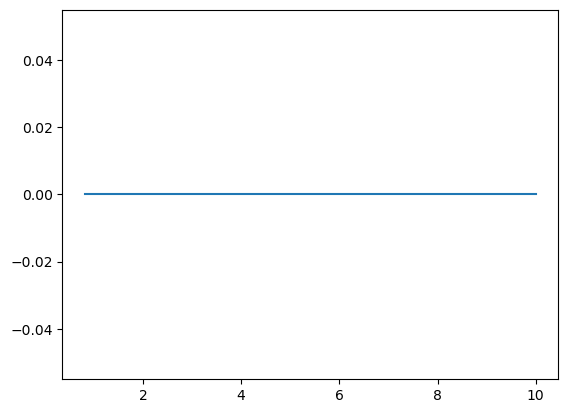

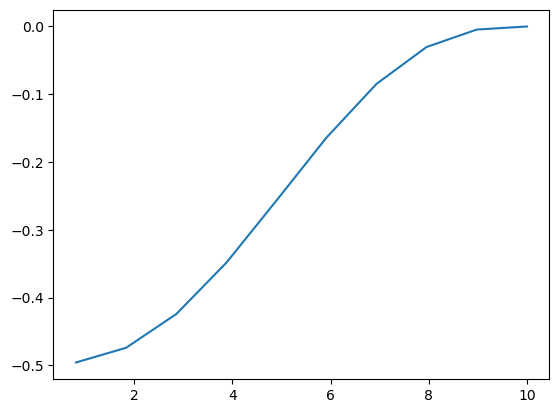

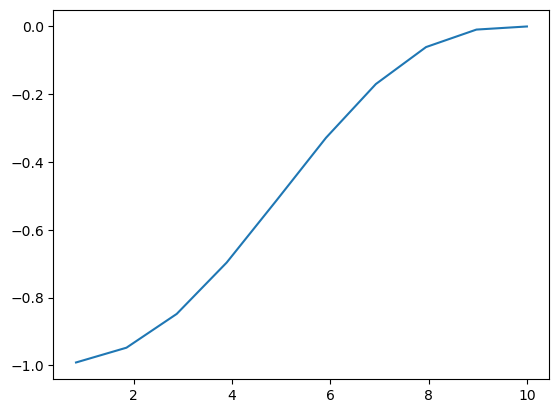

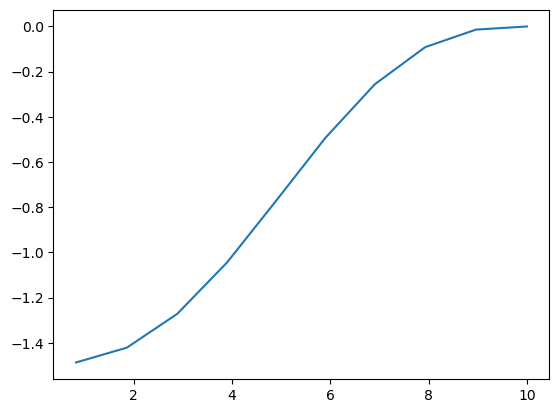

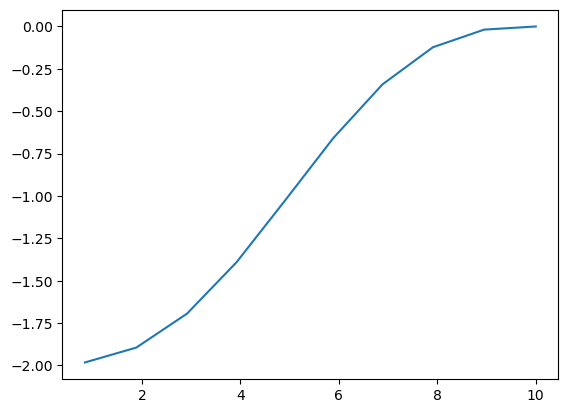

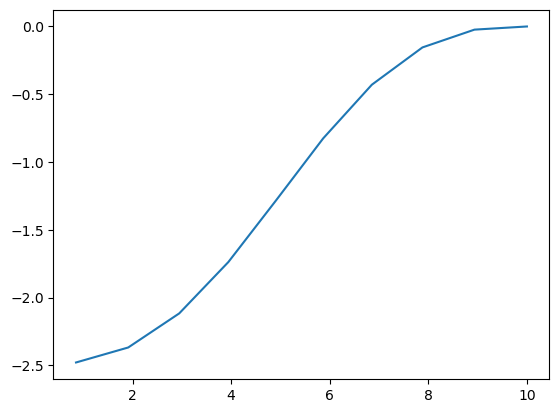

10


In [4]:
#right to left
for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i/2,0)
    path1=path[0][::-5]
    path2=path[1][::5]
    plt.plot(path1,path2)
    plt.show()

for i in range(6):
    path = _path_optimizer.optimize_spiral(10,i*-1/2,0)
    path1=path[0][::-5]
    path2=path[1][::5]
    plt.plot(path1,path2)
    plt.show()
print(len(path1))